In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.DataFrame(columns=["Location", "Week", "Rating", "Pacing", "Track"])

# Clean 2016 Data

The data for 2016 is in multiple files.

In [3]:
# Create empty DataFrame to dump data from csv files.
df_2016 = pd.DataFrame()

# Regex grabs weeks 1 - 7 and location from file name.
p = re.compile("Anon (Week \d) Feedback - (\w+).csv")
for csv in glob.glob("datasets/2016/*.csv"):
    match = p.search(csv)
    if match:
        csv_df = pd.read_csv(csv)
        csv_df['Week'] = match.group(1)[-1]
        csv_df['Location'] = match.group(2)
        df_2016 = df_2016.append(csv_df, ignore_index=True, sort=False)
pd.options.display.max_rows = 991
df_2016.head()

Timestamp  \
0  8/5/2016 1:39:41   
1  8/5/2016 1:40:47   
2  8/5/2016 1:40:50   
3  8/5/2016 1:42:44   
4  8/5/2016 1:45:13   

  How would you rate your overall satisfaction with the Summer Academy this week?  \
0                                                  3                                
1                                                  4                                
2                                                  4                                
3                                                  4                                
4                                                  5                                

  How well is the schedule paced? Week Location  \
0                               3    7   Taipei   
1                               3    7   Taipei   
2                               3    7   Taipei   
3                               4    7   Taipei   
4                               4    7   Taipei   

   How well are the tutorials paced? What track are you in? Unnamed: 0  
0                                NaN                    NaN        NaN  
1                                NaN                    NaN        NaN  
2                                NaN                    NaN        NaN  
3                                NaN                    NaN        NaN  
4                                NaN                    NaN        NaN

In [4]:
# Only select the columns I'm interested in 
df_2016 = df_2016.iloc[:, [1, 2, 3, 4, 5, 6]]
# df_2016.head()
df_2016.rename(columns={
    "How would you rate your overall satisfaction with the Summer Academy this week?": "Rating",
    "How well is the schedule paced?": "Pacing",
    "How well are the tutorials paced?": "Pacing",
    "What track are you in?": "Track"
}, inplace=True)

# Combine columns with similar names.
def sjoin(x):
    return ';'.join(x[x.notnull()].astype(str))
df_2016 = df_2016.groupby(level=0, axis=1).apply(lambda x: x.apply(sjoin, axis=1))
df_2016

Location Pacing Rating     Track Week
0       Taipei    3.0      3              7
1       Taipei    3.0      4              7
2       Taipei    3.0      4              7
3       Taipei    4.0      4              7
4       Taipei    4.0      5              7
5       Taipei    3.0      4              7
6       Taipei    3.0      4              7
7       Taipei    3.0      5              7
8       Taipei    3.0      5              7
9       Taipei    3.0      5              7
10      Taipei    3.0      3              7
11       Tokyo    4.0      3              6
12       Tokyo    3.0      4              6
13       Tokyo    1.0      4              6
14       Tokyo    2.0      4              6
15       Tokyo    4.0      5              6
16       Tokyo    3.0      3              6
17       Tokyo    5.0      5              6
18       Tokyo    2.0      4              6
19       Tokyo    4.0      3              6
20       Tokyo    3.0      5              6
21       Tokyo    3.0      5              6
22       Tokyo    4.0      4              6
23       Tokyo    3.0      4              6
24   Singapore    3.0      2              1
25   Singapore    3.0      2              1
26   Singapore    3.0      3              1
27   Singapore    4.0      4              1
28   Singapore    4.0      4              1
29   Singapore    4.0      4              1
30   Singapore    3.0      4              1
31   Singapore    3.0      4              1
32   Singapore    4.0      4              1
33   Singapore    3.0      4              1
34   Singapore    3.0      4              1
35   Singapore    5.0      5              1
36          LA    2.0      3     Intro    7
37          LA    3.0      5     Intro    7
38          LA    2.0      4     Games    7
39          LA    3.0      4     Intro    7
40          LA    3.0      4     Games    7
41          LA    3.0      5     Games    7
42          LA    4.0      4     Intro    7
43          LA    3.0      5     Games    7
44          LA    3.0      5     Games    7
45          SF    3.0      5      Apps    4
46          SF    3.0      4      Apps    4
47          SF    4.0      4      Apps    4
48          SF    4.0      3      Apps    4
49          SF    4.0      4      Apps    4
50          SF    4.0      3      Apps    4
51          SF    3.0      4      Apps    4
52          SF    3.0      5      Apps    4
53          SF    3.0      4      Apps    4
54          SF    3.0      4      Apps    4
55          SF    2.0      5      Apps    4
56          SF    3.0      4     Games    4
57          SF    3.0      4     Games    4
58          SF    4.0      5     Games    4
59          SF    5.0      5     Games    4
60          SF    3.0      5     Games    4
61          SF    4.0      5     Intro    4
62          SF    4.0      3     Intro    4
63          SF    4.0      4     Intro    4
64          SF    5.0      3     Intro    4
65          SF    4.0      4     Intro    4
66          SF    3.0      4     Intro    4
67          SF    3.0      3     Intro    4
68          SF    3.0      4     Intro    4
69          SF    3.0      5     Intro    4
70          SF    4.0      4     Intro    4
71          SF    3.0      5     Intro    4
72          SF    3.0      5        VR    4
73          SF    3.0      4        VR    4
74          SF    4.0      3        VR    4
75          SF    4.0      3        VR    4
76          SV    3.0      4      Apps    5
77          SV    3.0      5      Apps    5
78          SV    3.0      3      Apps    5
79          SV    3.0      2      Apps    5
80          SV    3.0      4     Games    5
81          SV    3.0      4     Games    5
82          SV    3.0      5      Apps    5
83          SV    3.0      3      Apps    5
84          SV    3.0      5      Apps    5
85          SV    4.0      4      Apps    5
86          SV    3.0      4      Apps    5
87          SV    3.0      5      Apps    5
88          SV    4.0      4     Intro    5
89          SV    3.0      5      Apps    5
90

One more thing! There's a row with unusable data. That will be curbed!

In [5]:
df_2016.drop(923, inplace=True)

Now the dataset is reletavily clean and ready to be combined with week 8's data.

The data is very different compared to the rest of the csvs. So we'll rename and drop columns to match the others.


In [6]:
df_week8 = pd.read_csv('datasets/2016/Week 8 Feedback (2016, incomplete) - results.csv')
df_week8.head()

#  \
0  00b836bda84e6bdbe780af97e249e59f   
1  39dde6dc0e1e375845d756fc7e39fc5f   
2  5e56b9de91670b308cb98dd2848b8739   
3  641081d05785b47a0f17448625da0d49   
4  c29bdd4f5678d78b450f4494e0f53c8c   

   How likely is it that you would recommend the Make School Summer Academy to a friend?  \
0                                                 10                                       
1                                                 10                                       
2                                                 10                                       
3                                                  9                                       
4                                                  3                                       

        location                track Start Date (UTC) Submit Date (UTC)  \
0       New York           summerApps      9/7/16 1:03       9/7/16 1:04   
1  San Francisco          summerIntro      9/7/16 1:03       9/7/16 1:04   
2       New York          summerIntro      9/7/16 1:03       9/7/16 1:05   
3      Sunnyvale  summerApps (4-week)      9/7/16 1:04       9/7/16 1:06   
4  San Francisco          summerIntro      9/7/16 1:04       9/7/16 1:11   

   Network ID  
0  3212b7a834  
1  f4954355aa  
2  3d69ca289b  
3  261608f95d  
4  d6672ddf6f

In [7]:
# Only select the columns that match other datasets.
df_week8 = df_week8.iloc[:, [1, 2, 3]]
# Rename columns.
df_week8.rename(columns={
    "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Rating",
    "location": "Location",
    "track": "Track"
}, inplace=True)
df_week8["Week"] = 8

In [8]:
df_week8.head()

Rating       Location                Track  Week
0      10       New York           summerApps     8
1      10  San Francisco          summerIntro     8
2      10       New York          summerIntro     8
3       9      Sunnyvale  summerApps (4-week)     8
4       3  San Francisco          summerIntro     8

Before I can add this dataframe to the 2016 dataframe I need to convert the rating column to integers

In [9]:
df_week8['Rating'] = pd.to_numeric(df_week8.Rating)
df_week8.Rating.describe()

count    65.000000
mean      8.646154
std       1.735932
min       3.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000
Name: Rating, dtype: float64

In [10]:
df_2016.append(df_week8, sort=False, ignore_index=True)
df_2016["Year"] = "2016"
df_2016.head()

Location Pacing Rating Track Week  Year
0   Taipei    3.0      3          7  2016
1   Taipei    3.0      4          7  2016
2   Taipei    3.0      4          7  2016
3   Taipei    4.0      4          7  2016
4   Taipei    4.0      5          7  2016

Cleaned!!

# Clean 2017 Data

There's not much that needs to be done for the 2017 dataset as it's all neatly packed into one csv.

In [11]:
df_2017 = pd.read_csv('datasets/2017/Student Feedback Surveys-Superview.csv')
# Tidy columns by removing 'ID' and renaming 'Rating (Num)'.
df_2017 = df_2017.drop(columns=['ID']).rename(columns={"Rating (Num)": "Rating", "Schedule Pacing": "Pacing"})
# Drop any NA/null data
df_2017 = df_2017.dropna()
# Make 'Rating' column numerical.
df_2017['Rating'] = pd.to_numeric(df_2017.Rating)
df_2017.head()

Location           Track    Week  Rating             Pacing
0  San Francisco  Apps, Explorer  Week 1       3         Just right
1    Los Angeles            Apps  Week 1       4  A little too fast
2  San Francisco           Games  Week 1       4       Way too slow
4  New York City  Apps, Explorer  Week 1       4         Just right
5   Redwood City            Apps  Week 1       5         Just right

The pacing and week are string values, but I want them to be integers to make it easier to calculate stuff.

In [12]:
def pace_to_int(pace):
    if pace == "Way too slow":
        return 1
    elif pace == "A little too slow":
        return 2
    elif pace == "Just right":
        return 3
    elif pace == "A little too fast":
        return 4
    elif pace == "Way too fast":
        return 5

def week_to_int(week):
    return int(week[-1])

df_2017["Pacing"] = df_2017.Pacing.apply(pace_to_int)
df_2017["Week"] = df_2017.Week.apply(week_to_int)
df_2017.head()

Location           Track  Week  Rating  Pacing
0  San Francisco  Apps, Explorer     1       3       3
1    Los Angeles            Apps     1       4       4
2  San Francisco           Games     1       4       1
4  New York City  Apps, Explorer     1       4       3
5   Redwood City            Apps     1       5       3

In [13]:
df_2017["Year"] = "2017"

# Combine

Now I can combine the two dataframes

In [14]:
df = df.append(df_2016, ignore_index=True, sort=False)
df = df.append(df_2017, ignore_index=True, sort=False)

In [15]:
df

Location Week Rating Pacing            Track  Year
0            Taipei    7      3    3.0                   2016
1            Taipei    7      4    3.0                   2016
2            Taipei    7      4    3.0                   2016
3            Taipei    7      4    4.0                   2016
4            Taipei    7      5    4.0                   2016
5            Taipei    7      4    3.0                   2016
6            Taipei    7      4    3.0                   2016
7            Taipei    7      5    3.0                   2016
8            Taipei    7      5    3.0                   2016
9            Taipei    7      5    3.0                   2016
10           Taipei    7      3    3.0                   2016
11            Tokyo    6      3    4.0                   2016
12            Tokyo    6      4    3.0                   2016
13            Tokyo    6      4    1.0                   2016
14            Tokyo    6      4    2.0                   2016
15            Tokyo    6      5    4.0                   2016
16            Tokyo    6      3    3.0                   2016
17            Tokyo    6      5    5.0                   2016
18            Tokyo    6      4    2.0                   2016
19            Tokyo    6      3    4.0                   2016
20            Tokyo    6      5    3.0                   2016
21            Tokyo    6      5    3.0                   2016
22            Tokyo    6      4    4.0                   2016
23            Tokyo    6      4    3.0                   2016
24        Singapore    1      2    3.0                   2016
25        Singapore    1      2    3.0                   2016
26        Singapore    1      3    3.0                   2016
27        Singapore    1      4    4.0                   2016
28        Singapore    1      4    4.0                   2016
29        Singapore    1      4    4.0                   2016
30        Singapore    1      4    3.0                   2016
31        Singapore    1      4    3.0                   2016
32        Singapore    1      4    4.0                   2016
33        Singapore    1      4    3.0                   2016
34        Singapore    1      4    3.0                   2016
35        Singapore    1      5    5.0                   2016
36               LA    7      3    2.0            Intro  2016
37               LA    7      5    3.0            Intro  2016
38               LA    7      4    2.0            Games  2016
39               LA    7      4    3.0            Intro  2016
40               LA    7      4    3.0            Games  2016
41               LA    7      5    3.0            Games  2016
42               LA    7      4    4.0            Intro  2016
43               LA    7      5    3.0            Games  2016
44               LA    7      5    3.0            Games  2016
45               SF    4      5    3.0             Apps  2016
46               SF    4      4    3.0             Apps  2016
47               SF    4      4    4.0             Apps  2016
48               SF    4      3    4.0             Apps  2016
49               SF    4      4    4.0             Apps  2016
50               SF    4      3    4.0             Apps  2016
51               SF    4      4    3.0             Apps  2016
52               SF    4      5    3.0             Apps  2016
53               SF    4      4    3.0             Apps  2016
54               SF    4      4    3.0             Apps  2016
55               SF    4      5    2.0             Apps  2016
56               SF    4      4    3.0            Games  2016
57               SF    4      4    3.0            Games  2016
58               SF    4      5    4.0            Games  2016
59               SF    4      5    5.0            Games  2016
60               SF    4      5    3.0            Games  2016
61               SF    4      5    4.0            Intro  2016
62               SF    4      3    4.0            Intro  2016
63               SF    4      4    4.0     

# On To The Questions

With the data combined, we can now do some calculations.

- Which track had the most promoters/detractors?
- What year had the greater NPS score?
- What is the probability that someone who complains about schedule pacing (too fast/too slow) was a detractor?

## Which track had the most promoters/detractors?


First, let's check the total number of each.

We'll do this by selecting the

In [16]:
track_df = df.iloc[:, [2, 4]]
# Remove rows where there is no track.
track_df = track_df[track_df.Track != '']
track_df.head()

Rating  Track
36      3  Intro
37      5  Intro
38      4  Games
39      4  Intro
40      4  Games

Some of the values under "Rating" appear as objects. We'll fix this first before we do any calculations.

In [19]:
for el in track_df["Rating"]:
    if type(el) is str:
        el = int(el)

In [20]:
ratings_list = list(track_df["Rating"])

In [21]:
for index, el in enumerate(ratings_list):
    ratings_list[index] = int(ratings_list[index])

In [22]:
track_df["Rating"] = ratings_list

In [30]:
def rating_to_type(rating):
    rating = int(rating)
    if rating < 6:
        return "Detractor"
    elif (rating >= 6) & (rating < 9):
        return "Passive"
    elif rating >= 9:
        return "Promoter"

track_df["Rating"] = df.Rating.apply(rating_to_type)
track_df.Rating.value_counts()

Detractor    865
Promoter     739
Passive      610
Name: Rating, dtype: int64

So it seems there are quite a lot of detractors. Wonder which tracks are contributing to this high number.

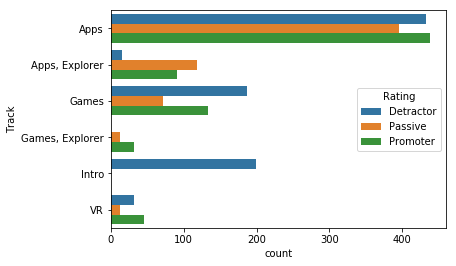

In [31]:
sns.countplot(y="Track", hue="Rating", data=track_df)

From this chart we see that the Apps track has the most promoters total. However, it's also visible that it had the most participants in general (evident by the high number of each).

This is making me think, perhaps an nps score for each track would be a better indicator of performance, though I still feel as though this isn't as reliable as I'd like it to be, due to the wide range in participants for each track.

## NPS scores for each Track

First thing to do is create an empty data frame with the index and columns of interest.

In [38]:
tracks = track_df.Track.unique()
track_nps_df = pd.DataFrame(index=tracks, columns=["NPS"])
track_nps_df

NPS
Intro            NaN
Games            NaN
Apps             NaN
VR               NaN
Apps, Explorer   NaN
Games, Explorer  NaN

In [59]:
def calculate_nps(data):
    # Grab detractors and promoters.
    df_detractors = data[data["Rating"] == "Detractor"]
    df_promoters = data[data["Rating"] == "Promoter"]
    
    # Calculate and return nps score.
    nps_score = (df_promoters.Rating.count() - df_detractors.Rating.count()) / data.Rating.count()
    return nps_score

In [55]:
for track in tracks:
    nps_score = calculate_nps(track_df[track_df["Track"] == track])
    track_nps_df.loc[track].NPS = nps_score

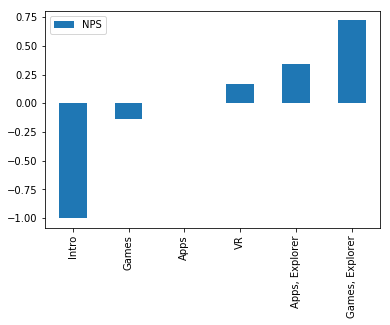

In [60]:
track_nps_df.plot.bar()

That's odd, it looks like Apps has a very low score. Let's double check that.

In [64]:
track_nps_df.loc["Apps"]

NPS    0.00394945
Name: Apps, dtype: object

Not bad! At least it's positive üëåüèæ

But now my question is, which year had the best scores?

# What year had the greater NPS score?

In [25]:
track_df["Rating"] = track_df.Rating.astype('category')

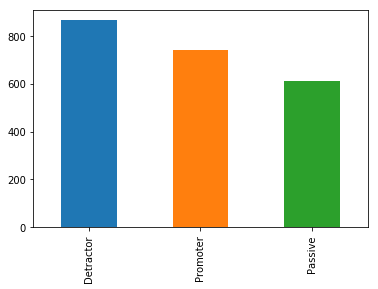

In [26]:
track_df.Rating.value_counts().plot(kind='bar')

So, it looks like for 2016 and 2017 combined, there were more detractors than promoters.

Next, we'll check which track had the most promoters and detractors. 

In [27]:
track_df["Track"] = track_df.Track.astype("category")

In [28]:
df_detractors = track_df[track_df["Rating"] == "Detractor"]
df_promoters = track_df[track_df["Rating"] == "Promoter"]

In [29]:
nps_score = (df_promoters.count() - df_detractors.count()) / track_df.count()
nps_score

Rating   -0.056911
Track    -0.056911
dtype: float64